In [9]:
%pip install tensorflow
%pip install seaborn
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import os

#base settings

baseDir = "./datasets/VegetableDataset/"
os.listdir(baseDir)

batch_size = 4
image_size = 64

In [11]:
import tensorflow as tf

# Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + "train",
    labels="inferred", #figure out the values
    label_mode="categorical",  # Use categorical for multi-class classification
    image_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=True,
    seed=42            
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + "dev",
    labels="inferred",
    label_mode="categorical",
    image_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

# Test dataset (assuming separate directory for test data)
test_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + "test",
    labels="inferred",
    label_mode="categorical",
    image_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=False  # No shuffling for test set
)

print(train_ds.class_names)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [12]:
# define model layers
from tensorflow.keras import layers
import tensorflow as tf

model = tf.keras.applications.MobileNetV2(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(image_size, image_size, 3),
    pooling=None,
    classes=15,
    classifier_activation='softmax'
)

In [13]:
model.summary()

Model: "mobilenetv2_1.00_64"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 32, 32,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 32, 32,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 32, 32,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 32, 32,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 32, 32,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 32, 32,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 33, 33,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 16, 16,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 16, 16,    │      2,304 │ block_1_depthwis

 Total params: 2,277,199 (8.69 MB)

 Trainable params: 2,243,087 (8.56 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [14]:
model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',  # Suitable for classification
                  metrics=['accuracy'])

In [15]:
epochs = 20
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 246s 62ms/step - accuracy: 0.1474 - loss: 2.6155 - val_accuracy: 0.0667 - val_loss: 2.8257
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 232s 62ms/step - accuracy: 0.3380 - loss: 1.9874 - val_accuracy: 0.4653 - val_loss: 1.8345
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 233s 62ms/step - accuracy: 0.4828 - loss: 1.5810 - val_accuracy: 0.5350 - val_loss: 2.1493
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 237s 63ms/step - accuracy: 0.5994 - loss: 1.2572 - val_accuracy: 0.6993 - val_loss: 1.4952
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 308s 82ms/step - accuracy: 0.6940 - loss: 0.9720 - val_accuracy: 0.7283 - val_loss: 1.4109
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 272s 73ms/step - accuracy: 0.7657 - loss: 0.7729 - val_accuracy: 0.7577 - val_loss: 1.1703
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 300s 80ms/step - accuracy: 0.7970 - loss: 0.6629 - val_accuracy: 0.8173 - val_loss: 0.7165
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 294s 78ms/step - accuracy: 

750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9387 - loss: 0.2467


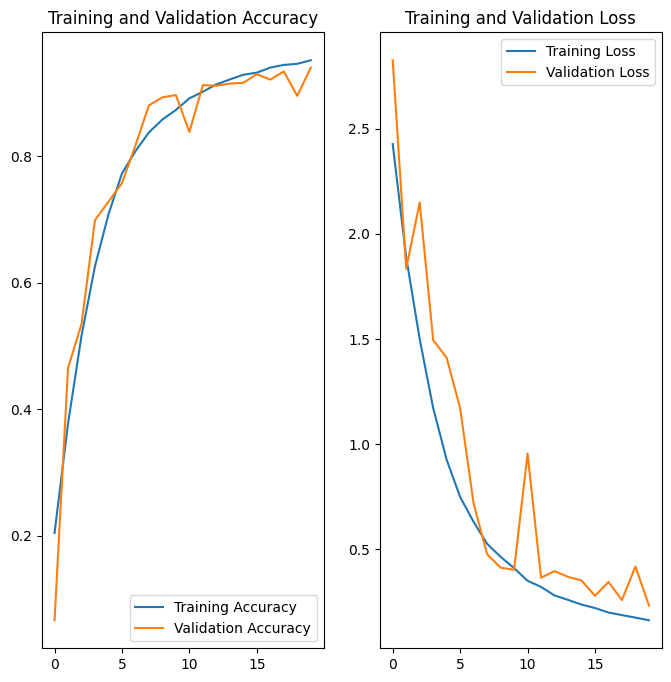

In [17]:
import matplotlib.pyplot as plt

model.evaluate(test_ds)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Essentially, you should test and evaluate your model before saving the weights. Ensure your model does not overfit or underfit with your current data.

In [ ]:
# Save both complete model and weights for different use cases

# Save complete model (recommended)
model.save("./weights/mobilenetvegetables_complete.keras")
print("Complete model saved as .keras file")

# Save just the weights (for loading into same architecture)
model.save_weights("./weights/mobilenetvegetables_weights_only.h5")
print("Weights only saved as .h5 file")

# For backward compatibility, also save the old way
model.save("./weights/mobilenetvegetables.weights.h5")
print("Model saved in legacy format")